**Batch Normalization**

Batch Normalization help mitigating of exploding/vanishing gradient probelm by normalizing the activation of each layer in the network.

- Compute the mean and variance
- Normalize the activations.
- Sacle and Shift.

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Flatten
from keras.optimizers import Adam

In [4]:
# creating a simple sequential models
model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128, activation='relu'),
    BatchNormalization(), # adding batch normalization layer
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
# compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
# summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 110,154 (430.29 KB)

 Trainable params: 109,770 (428.79 KB)

 Non-trainable params: 384 (1.50 KB)

In [10]:
## Visualizing Batch Normalization.

import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split


In [11]:
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Build model without batch normalization
model_no_bn = Sequential([
    Dense(64, activation='relu', input_dim=20),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model_no_bn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_no_bn = model_no_bn.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.6959 - loss: 0.6041 - val_accuracy: 0.7100 - val_loss: 0.5516
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8239 - loss: 0.4881 - val_accuracy: 0.8000 - val_loss: 0.4843
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8490 - loss: 0.4371 - val_accuracy: 0.8300 - val_loss: 0.4436
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8655 - loss: 0.3976 - val_accuracy: 0.8400 - val_loss: 0.4171
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8764 - loss: 0.3585 - val_accuracy: 0.8550 - val_loss: 0.3951
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8904 - loss: 0.3278 - val_accuracy: 0.8500 - val_loss: 0.3841
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8717 - loss: 0.3397 - val_accuracy: 0.8600 - val_loss: 0.3727
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8712 - loss: 0.3137 - val_accuracy: 0.8600 - val_loss

In [14]:
# Build model with batch normalization
model_with_bn = Sequential([
    Dense(64, activation='relu', input_dim=20),
    BatchNormalization(),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model_with_bn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_with_bn = model_no_bn.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9025 - loss: 0.2585 - val_accuracy: 0.8700 - val_loss: 0.3602
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8908 - loss: 0.2830 - val_accuracy: 0.8650 - val_loss: 0.3558
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8893 - loss: 0.2830 - val_accuracy: 0.8700 - val_loss: 0.3544
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8929 - loss: 0.2788 - val_accuracy: 0.8650 - val_loss: 0.3546
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9095 - loss: 0.2505 - val_accuracy: 0.8700 - val_loss: 0.3519
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9038 - loss: 0.2719 - val_accuracy: 0.8800 - val_loss: 0.3503
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8897 - loss: 0.2605 - val_accuracy: 0.8650 - val_loss: 0.3523
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8936 - loss: 0.2574 - val_accuracy: 0.8700 - val_loss

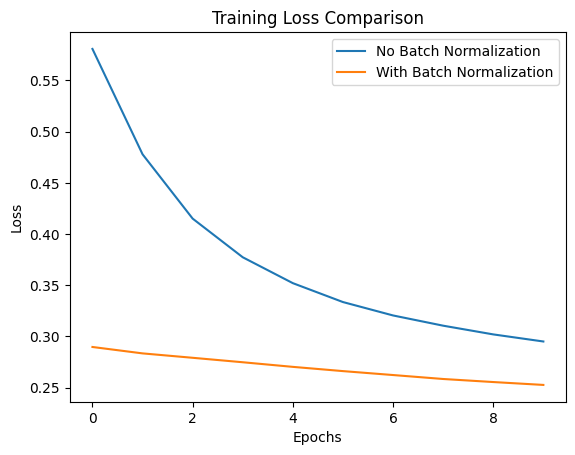

In [17]:
# Plotting the training loss curves
plt.plot(history_no_bn.history['loss'], label='No Batch Normalization')
plt.plot(history_with_bn.history['loss'], label='With Batch Normalization')
plt.title('Training Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [18]:
# Tips


* -1. When to use Batch Normalization
* -2. Batch Normalization at test time
* -3. Dropout vs Batch Normalization
* -4. Training with small batch sizes